## 1. Competing in android app market? Here's what you need to know!

<p>Mobile apps are everywhere. They are easy to create and can be lucrative. Because of these two factors, more and more apps are being developed. In this notebook, we will do a comprehensive analysis of the Android app market by comparing over ten thousand apps in Google Play across different categories. We'll look for insights in the data to devise strategies to drive growth and retention.</p>

<p>Let's take a look at the data, which consists of two files:</p>
<ul>
<li><code>apps.csv</code>: contains all the details of the applications on Google Play. There are 13 features that describe a given app.</li>
<li><code>user_reviews.csv</code>: contains 100 reviews for each app, <a href="https://www.androidpolice.com/2019/01/21/google-play-stores-redesigned-ratings-and-reviews-section-lets-you-easily-filter-by-star-rating/">most helpful first</a>. The text in each review has been pre-processed and attributed with three new features: Sentiment (Positive, Negative or Neutral), Sentiment Polarity and Sentiment Subjectivity.</li>
</ul>

In [270]:
# Read in dataset
import pandas as pd
apps_with_duplicates = pd.read_csv('datasets/apps.csv',index_col=0)

# Drop duplicates
apps = apps_with_duplicates.drop_duplicates()

# Print the total number of apps and shape of the data
print('Total number of apps in the dataset = ', len(apps))
print('Shape of the data = ', apps.shape)

# Have a look at a random sample of 5 entries
n = 5
apps.sample(n)

Total number of apps in the dataset =  9659
Shape of the data =  (9659, 13)


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
5190,ParaTek Ai Speech generator,TOOLS,3.6,448,4.3M,"50,000+",Free,0,Everyone,Tools,"March 23, 2017",1.9,1.6 and up
10504,Motocross Beach Jumping 3D,FAMILY,4.0,105954,43M,"10,000,000+",Free,0,Teen,Simulation,"June 5, 2018",1.7.3,4.1 and up
5164,AH Lake Villa,MEDICAL,NaN,3,27M,100+,Free,0,Everyone,Medical,"April 22, 2017",300000.0.78,4.0.3 and up
3361,4K Wallpapers and Ultra HD Backgrounds,PERSONALIZATION,4.6,7583,3.8M,"500,000+",Free,0,Everyone 10+,Personalization,"July 4, 2018",2.6.2.1,4.0.3 and up
7238,CF SHOP!,LIFESTYLE,2.8,88,43M,"10,000+",Free,0,Everyone,Lifestyle,"June 30, 2018",1.8.1,4.4 and up


## 2. About the data

<p>The data we have is structured as features as columns and observations as rows. The features consists of following information:
    <ul>
        <li><code>App</code>: Name of the application</li>
        <li><code>Category</code>: Which category corresponding app belongs to</li>
        <li><code>Rating</code>: Average rating from the user.</li>
        <li><code>Reviews</code>:Total number of reviews in the app</li>
        <li><code>Size</code>: Memory size of apps</li>
        <li><code>Installs</code>: The number of particular app is installed by the users</li>
        <li><code>Type</code>: Whether an app is free or paid</li>
        <li><code>Price</code>: The cost of installing or using the paid app</li>
        <li><code>ContentRating</code>:The contents in the app +18 or everyone</li>
        <li><code>Genres</code>: Category of an app</li>
        <li><code>LastUpdated</code>: Timestamp of latest update</li>
        <li><code>CurrentVer</code>: Current version of an app</li>
        <li><code>AndrioidVer</code>: Supported version of android</li></ul> </p>

## 3.  Data Cleaning

<p>The three features that we will be working with most frequently henceforth are <code>Installs</code>, <code>Size</code>, and <code>Price</code>. A careful glance of the dataset reveals that some of these columns mandate data cleaning in order to be consumed by code we'll write later. Specifically, the presence of special characters (<code>, $ +</code>) and letters (<code>M k</code>) in the <code>Installs</code>, <code>Size</code>, and <code>Price</code> columns make their conversion to a numerical data type difficult. Let's clean by removing these and converting each column to a numeric type. Also, we have last updated date od an app which can be converted to its specific object for further analysis.</p>

In [271]:
chars_to_remove = ['+',',','M','$']
cols_to_clean = ['Installs','Size','Price']

# Loop for each column
for col in cols_to_clean:
    # Replace the characters in each column col with an empty string
    for char in chars_to_remove:
        apps[col] = apps[col].str.replace(char, '')
    # Convert col to numeric
    apps[col] = pd.to_numeric(apps[col])
#Change Last Update to datetime object
apps['Last Updated'] = pd.to_datetime(apps['Last Updated'], format = "%B %d, %Y")
apps.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19.0,10000,Free,0.0,Everyone,Art & Design,2018-01-07,1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,5000000,Free,0.0,Everyone,Art & Design,2018-08-01,1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25.0,50000000,Free,0.0,Teen,Art & Design,2018-06-08,Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,100000,Free,0.0,Everyone,Art & Design;Creativity,2018-06-20,1.1,4.4 and up


## 4. What type of apps have more competitors?

<p>With more than 1 billion active users in 190 countries around the world, Google Play continues to be an important distribution platform to build a global audience. For businesses to get their apps in front of users, it's important to make them more quickly and easily discoverable on Google Play. To improve the overall search experience, Google has introduced the concept of grouping apps into categories.</p>
<p>This brings us to the following questions:</p>
<ul>
<li>Which category has the highest share of (active) apps in the market? </li>
<li>Is any specific category dominating the market?</li>
<li>Which categories have the fewest number of apps?</li>
</ul>
<p>We will see that there are <code>33</code> unique app categories present in our dataset. <em>Family</em> and <em>Game</em> apps have the highest market prevalence. Interestingly, <em>Tools</em>, <em>Business</em> and <em>Medical</em> apps are also at the top.</p>

In [273]:
import plotly
plotly.offline.init_notebook_mode(connected=True)
import plotly.graph_objs as go

# Print the total number of unique categories
num_categories = len(apps['Category'].unique())
print('Number of categories = ', num_categories)

# Count the number of apps in each 'Category' and sort them for easier plotting
num_apps_in_category = apps['Category'].value_counts().sort_values(ascending=False)

data = [go.Bar(
        x = num_apps_in_category.index, # index = category name
        y = num_apps_in_category.values, # value = count
)]
layout = go.Layout(title = 'Popular App Categories')
plotly.offline.iplot({'data':data,'layout':layout})

Number of categories =  33


## 5. How well are these apps rated?

<p>After having witnessed the market share for each category of apps, let's see how all these apps perform on an average. App ratings (on a scale of 1 to 5) impact the discoverability, conversion of apps as well as the company's overall brand image. Ratings are a key performance indicator of an app.</p>
<p>From our research, we found that the average volume of ratings across all app categories is <code>4.17</code>. The histogram plot is skewed to the right indicating that the majority of the apps are highly rated with only a few exceptions in the low-rated apps.</p>

In [274]:
# Average rating of apps
avg_app_rating = apps['Rating'].mean()
print('Average app rating = ', avg_app_rating)

# Distribution of apps according to their ratings
data = [go.Histogram(
        x = apps['Rating'],
        xbins = {'start': 1, 'size': 0.1, 'end' : 5}
)]

# Vertical dashed line to indicate the average app rating
layout = {'shapes': [{
              'type' :'line',
              'x0': avg_app_rating,
              'y0': 0,
              'x1': avg_app_rating,
              'y1': 1000,
              'line': { 'dash': 'dashdot'}
          }],'title' : 'App Ratings'
          }

plotly.offline.iplot({'data': data, 'layout': layout})

Average app rating =  4.173243045387994


## 6. Most dominating ones?

<p>Over billions of users active accross the world,they have thier own preferences.However, there are certains addictive apps we can't get over.Right? From our above result,family and games have the highest market share. But,are there any dominant apps which are mostly used with huge number of active members but less market share?Although games category has the highest number of installation of <b>13 billion</b>, people have <b>952</b> choices to what kinds of games they are interested in. While communication seems to be dominating with <b>11 billion users</b> with only <b>315</b> competitors.This is what people used mostly for and they are some companies leading the market. So, it's wiser to create apps with more diversification rather than competing with already successful apps. For instance, a beauty product app would have less competition (only 50 owners) with over million of users. An Effective marketing strategy is what we need to reach the customers.</p>

In [275]:
#Grouping categories with most installed
dominant_apps = apps.groupby('Category')['Installs'].sum().sort_values(ascending=False)
data = [go.Bar(
        x = dominant_apps.index, # index = category name
        y = dominant_apps.values, # value = count
)]

layout = go.Layout({'title' : 'Most installed Apps'})
plotly.offline.iplot({'data':data,'layout':layout})

## 7. Does size and cost matter to users?

<p>Let's now examine app size and app price. For size, if the mobile app is too large, it may be difficult and/or expensive for users to download. Lengthy download times could turn users off before they even experience your mobile app. Plus, each user's device has a finite amount of disk space. For price, some users expect their apps to be free or inexpensive. These problems compound if the developing world is part of your target market; especially due to internet speeds, earning power and exchange rates.</p>
<p>How can we effectively come up with strategies to size and price our app?</p>
<ul>
<li>Does the size of an app affect its rating? </li>
<li>Do users really care about system-heavy apps or do they prefer light-weighted apps? </li>
<li>Does the price of an app affect its rating? </li>
<li>Do users always prefer free apps over paid apps?</li>
</ul>
<p>We find that the majority of top rated apps (rating over 4) range from 2 MB to 20 MB. We also find that the vast majority of apps price themselves under \$10.</p>

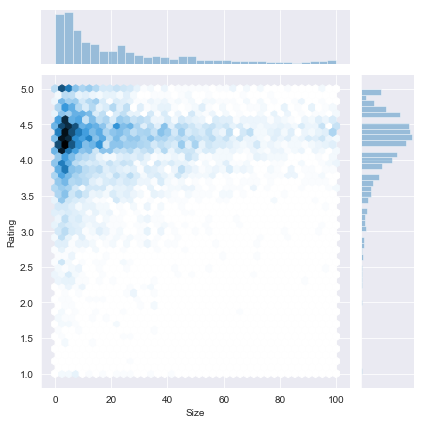

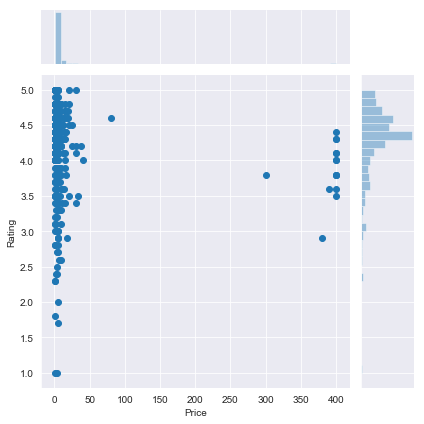

In [276]:
%matplotlib inline
import seaborn as sns
sns.set_style("darkgrid")
import warnings
warnings.filterwarnings("ignore")

# Subset for categories with at least 250 apps
large_categories = apps.groupby('Category').filter(lambda x: len(x) >= 250).reset_index()

# Plot size vs. rating
plt1 = sns.jointplot(x = 'Size', y = "Rating", data = large_categories, kind = 'hex')

# Subset for paid apps only
paid_apps = apps.loc[apps['Type']=='Paid']

# Plot price vs. rating
plt2 = sns.jointplot(x = 'Price', y = 'Rating', data = paid_apps)

## 8. Are users willing to pay for an app? If yes, then how much?

<p>So now comes the hard part. How are companies and developers supposed to make ends meet? What monetization strategies can companies use to maximize profit? The costs of apps are largely based on features, complexity, and platform.</p>
<p>There are many factors to consider when selecting the right pricing strategy for your mobile app. It is important to consider the willingness of your customer to pay for your app. A wrong price could break the deal before the download even happens. Potential customers could be turned off by what they perceive to be a shocking cost, or they might delete an app they’ve downloaded after receiving too many ads or simply not getting their money's worth.</p>

<p>Different categories demand different price ranges. Some apps that are simple and used daily, like the calculator app, should probably be kept free. However, it would make sense to charge for a highly-specialized medical app that diagnoses diabetic patients. Below, we see that <em>Medical and Family</em> apps are the most expensive. Some medical apps extend even up to \$80! All game apps are reasonably priced below \$20.</p>

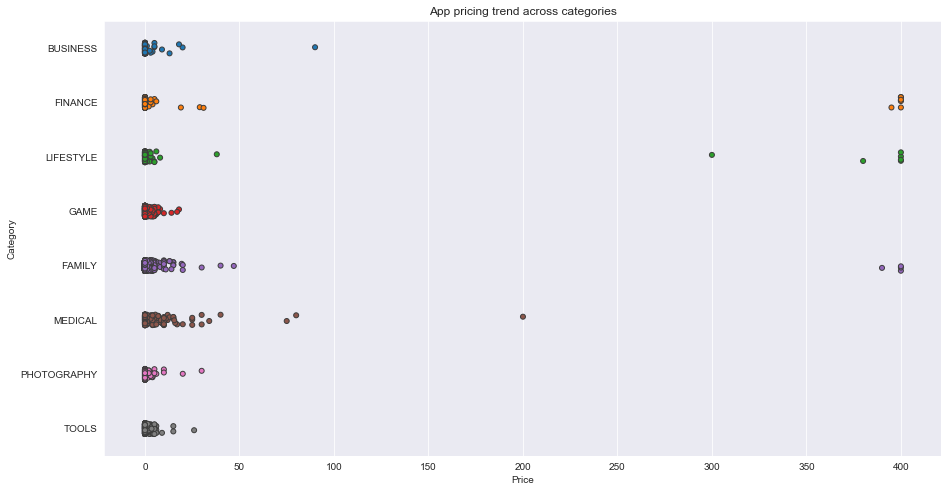

In [277]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
fig.set_size_inches(15, 8)

# Select a few popular app categories
popular_app_cats = apps[apps.Category.isin(['GAME', 'FAMILY', 'PHOTOGRAPHY',
                                            'MEDICAL', 'TOOLS', 'FINANCE',
                                            'LIFESTYLE','BUSINESS'])]

# Examine the price trend for the subset of categories
ax = sns.stripplot(x='Price', y='Category', data=popular_app_cats,
                   jitter=True, linewidth=1)
ax.set_title('App pricing trend across categories')

# Category, Name and Price of apps priced above $200
apps_above_200 = apps.query('Price > 200')

## 9. Filter out "junk" apps to identify best price
<p>It looks like a bunch of the really expensive apps are "junk" apps. That is, apps that don't really have a purpose. Some app developer may create an app called <em>I Am Rich Premium</em> or <em>most expensive app (H)</em> just for a joke or to test their app development skills. Some developers even do this with malicious intent and try to make money by hoping people accidentally click purchase on their app in the store.</p>
<p>Let's filter out these junk apps and re-do our visualization. The distribution of apps under \$20 becomes clearer.</p>

Text(0.5, 1.0, 'App pricing trend across categories after filtering for junk apps')

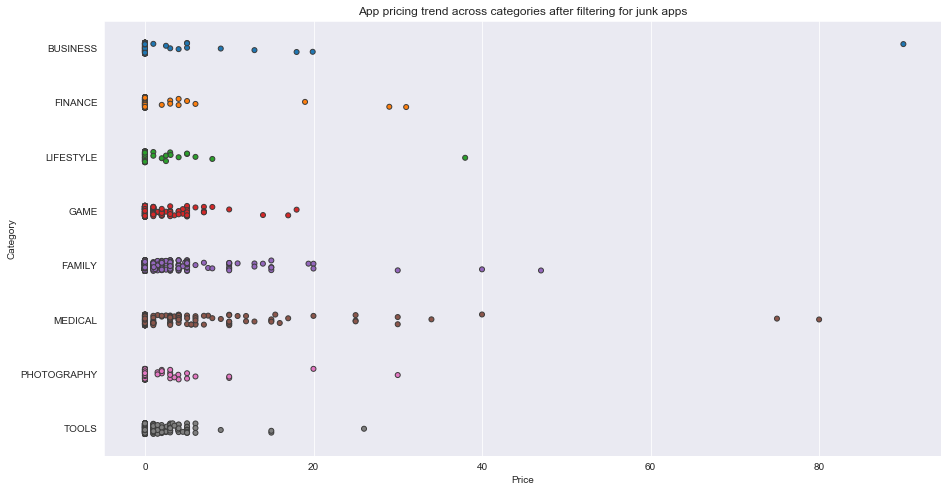

In [278]:
# Select apps priced below $100
apps_under_100 = popular_app_cats.query('Price < 100')

fig, ax = plt.subplots()
fig.set_size_inches(15, 8)

# Examine price vs category with the authentic apps
ax = sns.stripplot(x='Price', y='Category', data=apps_under_100,
                   jitter=True, linewidth=1)
ax.set_title('App pricing trend across categories after filtering for junk apps')

## 10. Popularity of paid apps vs free apps

<p>For apps in the Play Store today, there are five types of pricing strategies: free, freemium, paid, paymium, and subscription. Let's focus on free and paid apps only. Some characteristics of free apps are:</p>
<ul>
<li>Free to download.</li>
<li>Main source of income often comes from advertisements.</li>
<li>Often created by companies that have other products and the app serves as an extension of those products.</li>
<li>Can serve as a tool for customer retention, communication, and customer service.</li>
</ul>
<p>Some characteristics of paid apps are:</p>
<ul>
<li>Users are asked to pay once for the app to download and use it.</li>
<li>The user can't really get a feel for the app before buying it.</li>
</ul>
<p>Are paid apps are installed as much as free apps? It turns out that paid apps have a relatively lower number of installs than free apps, though the difference is not as stark as we would have expected!</p>

In [280]:
trace0 = go.Box(
    # Data for paid apps
    y=apps['Installs'][apps['Type']=='Paid'],
    name = 'Paid'
)

trace1 = go.Box(
    # Data for free apps
    y=apps['Installs'][apps['Type']=='Free'],
    name = 'Free'
)

layout = go.Layout(
    title = "Paid apps vs. Free apps (Downloads)",
    yaxis = dict(
       type = 'log', 
        autorange = True
    )
)

# Add trace0 and trace1 to a list for plotting
data = [trace0,trace1]
plotly.offline.iplot({'data': data, 'layout': layout})

## 11. User's reaction on products

<p>Mining user review data to determine how people feel about your product, brand, or service can be done using a technique called sentiment analysis. User reviews for apps can be analyzed to identify if the mood is positive, negative or neutral about that app. For example, positive words in an app review might include words such as 'amazing', 'friendly', 'good', 'great', and 'love'. Negative words might be words like 'malware', 'hate', 'problem', 'refund', and 'incompetent'.</p>
<p>By plotting sentiment polarity scores of user reviews for paid and free apps, we observe that free apps receive a lot of harsh comments, as indicated by the outliers on the negative y-axis. Reviews for paid apps appear never to be extremely negative. This may indicate something about app quality, i.e., paid apps being of higher quality than free apps on average. The median polarity score for paid apps is a little higher than free apps, thereby syncing with our previous observation.</p>

In [281]:
# Load user_reviews.csv
reviews_df = pd.read_csv('datasets/user_reviews.csv')

# Join and merge the two dataframe
merged_df = pd.merge(apps,reviews_df, on = 'App', how = "inner")

# Drop NA values from Sentiment and Translated_Review columns
merged_df = merged_df.dropna(subset=['Sentiment', 'Translated_Review'])

# User review sentiment polarity for paid vs. free apps
trace0 = go.Box(
    # Data for paid apps
    y = merged_df['Sentiment_Polarity'][merged_df['Type']=='Paid'],
    name = 'Paid'
)

trace1 = go.Box(
    # Data for free apps
    y= merged_df['Sentiment_Polarity'][merged_df['Type']=='Free'],
    name = 'Free'
)

layout = go.Layout(
    title = "Paid Apps vs. Free Apps (User's reaction)",
    yaxis = dict( 
        autorange = True
    )
)

# Add trace0 and trace1 to a list for plotting
data = [trace0,trace1]
plotly.offline.iplot({'data': data, 'layout': layout})


<b><i><p> Based on the findings from analyzing ten thousands of apps from google play store, we can inform our decisions on what kind of app we should create to gain popularity in the market considering the size of an app and cost if the contents are premium.</p></i></b>